In [305]:
%reset -f 

In [306]:
import handcalcs.render
bold = '\033[1m'
from math import sqrt, pi

# **DESIGN OF TIMBER TRUSS**

### Timber properties (BS EN 336, Table 1) and k-factors
#### Use of solid timber of class C24


In [307]:
%%render
# Parameters
f_t0k = 14.5 #MPa
f_c0k = 21 #MPa
E_0mean = 11000 #MPa
E_005 = 7400 #MPa
rho_k = 350 #kg/m^3
rho_mean = 420 #kg/m^3
gamma_m = 1.3
k_mod = 0.8 # assumption - service class 2, medium term duration 
k_def = 0.8 # assumption - service class 2
f_c0d = (f_c0k*k_mod)/gamma_m #MPa
f_t0d = (f_t0k*k_mod)/gamma_m #MPa

<IPython.core.display.Latex object>

### Structural Analysis
##### 1. The truss has been analysed in STAAD Pro. The structural layout and member forces are shown in the images below.
##### 2. Members have been numbered from 1-8 alongside their lengths.
##### 3. Sign convention: **Tension (-ve)** and **compression (+ve)**.
##### 4. Static equilibrium check is OK!
##### 5. 90kN is the **ULS load**.

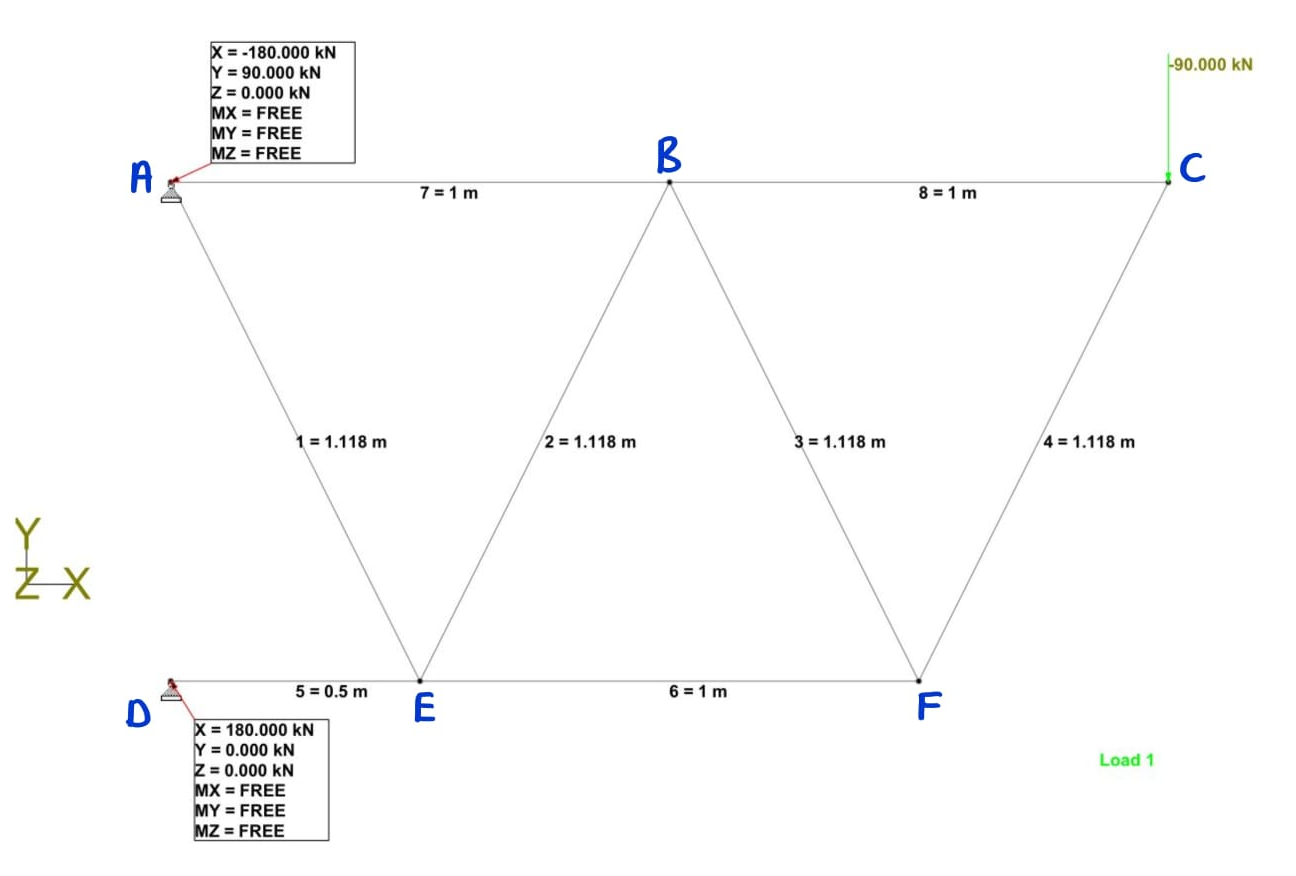

In [308]:
%%render
# Parameters
l_diag = 1.118 #m, length of diagonal members
l_5 = 0.5 #m
l_6 = 1 #m
l_7 = 1 #m
l_8 = 1 #m

<IPython.core.display.Latex object>

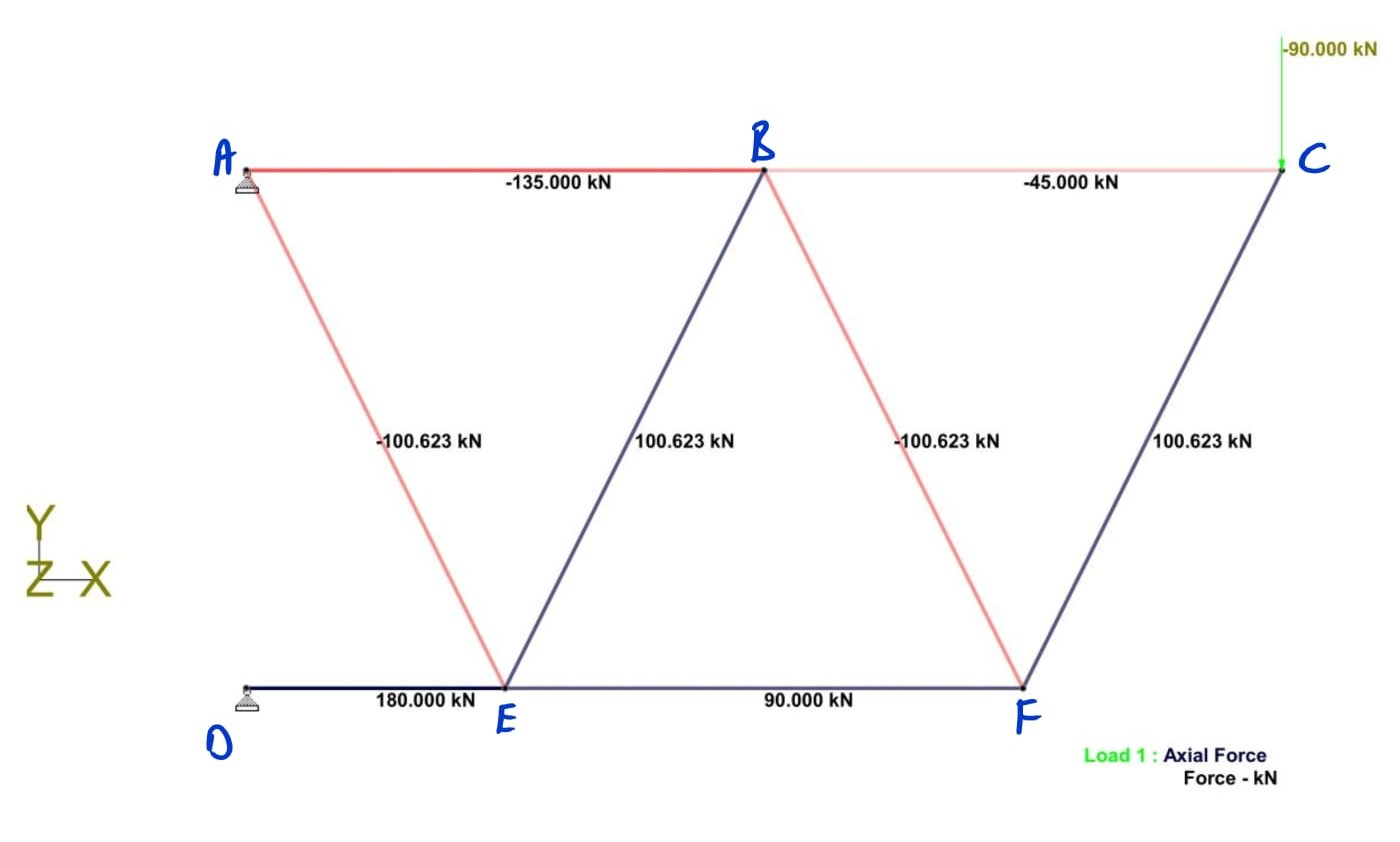

#### Member forces and lengths

In [309]:
%%render
#Parameters
F_1 = 100.623 #kN, tension
F_2 = 100.623 #kN, compression
F_3 = 100.623 #kN, tension
F_4 = 100.623 #kN, compression
F_5 = 180 #kN, compression
F_6 = 90 #kN, compression
F_7 = 135 #kN, tension
F_8 = 45 #kN, tension

<IPython.core.display.Latex object>

## **PART 1: Connection Design**
##### 1. Begin design by assuming a rectangular section with **b=100mm** and **h=?mm** (depth to determined based on connection design).
##### 2. Design calculation is based on member with largest tensile force (i.e.) member 7
##### 3. Number of bolts required for lower tensile members has been conducted by changing the force values below.
##### 4. Members in compression transfer force by bearing and so only provide 2 bolts for anchoring the gusset plate. 

### **Bolted connection with gusset plates**
##### 1. 10mm, S275 thick gusset plates on both sides.
##### 2. 18 x 150mm, grade 8.8 bolts.
##### 3. Consider most tensile member in joint B (i.e.) member 7. Compression members transfer/receive force by bearing.


In [310]:
%%render 
t_2 = 100 #mm, thickness of timber section
d = 18 #mm, bolt diametre
f_uk = 800 #MPa
f_h2k = 0.082*(1-0.01*d)*rho_k #MPa
M_yk = 0.3*f_uk*d**2.6 #Nmm

<IPython.core.display.Latex object>

#### Determining R_k

In [311]:
%%render
I_B = 0.5*f_h2k*t_2*d #N
III_B = 1.15*sqrt(2*M_yk*f_h2k*d) #N
II_C = 2.3*sqrt(M_yk*f_h2k*d) #N
R_k = 2*min(I_B, III_B, II_C) #N, two shear planes
R_d = R_k*k_mod/gamma_m #N

<IPython.core.display.Latex object>

In [312]:
%%render
n_bolts = (F_7*1000)/R_d #number of bolts

<IPython.core.display.Latex object>

##### 2 rows with each row containing 3 bolts

#### Minimum distances 

In [313]:
%%render
n_row = 2
n = 6/n_row #calculations performed per row 
n_eff = (F_7*1000)/(R_d*n_row) 
a_1 = max(5*d, 13*d*(n_eff/n**0.9)**4) #mm, a1 spacing from EC5 and n_eff requirements
a_2 = 4*d #mm
a_3t = max(7*d,80) #mm
a_4c = 3*d #mm

<IPython.core.display.Latex object>

#### Adopted distances

In [314]:
%%render
a_1 = 202 #mm, parallel to grain
a_2 = 80 #mm, perpendicular to grain
a_3t = 130 #mm, loaded end
a_4c = 60 #mm, unloaded edge

h = 2*(a_4c)+a_2 #mm, required depth of section based on spacing requirements

<IPython.core.display.Latex object>

## **PART 2: ULS Design Check**
##### 1. Try **200mm x 100mm** section for all members (as obtained from **PART ONE** above).
##### 2. Truss has been designed such that buckling doesn't exist (see submitted report).
##### 3. Therefore, only need to check two members. One in tension and one in compression.

#### Compression check

In [315]:
%%render
A = (t_2*h) #mm^2, gross cross sectional area
A_net = (t_2*h)-(2*(pi/4)*(d**2)) #mm^2, subtract area of two bolts, net area
F_c0d = F_5 #kN, member 5 has highest compression
sigma_c0d = F_c0d*1000/A_net #MPa
f_c0d = f_c0d #MPa, recall design strength from above

<IPython.core.display.Latex object>

In [316]:
if sigma_c0d <= f_c0d:
    print (bold + 'sigma_c0d <= f_c0d ∴ OK in compression')
else:
    print (bold + 'sigma_c0d >= f_c0d ∴ NOT OK in compression')

sigma_c0d <= f_c0d ∴ OK in compression


#### Tension check

In [317]:
%%render
F_t0d = F_7 #kN, member 7 has highest tension
sigma_t0d = F_7*1000/A_net #MPa
f_t0d = f_t0d #MPa, recall design strength from above

<IPython.core.display.Latex object>

In [318]:
if sigma_t0d <= f_t0d:
    print (bold + 'sigma_t0d <= f_t0d ∴ OK in tension')
else:
    print (bold + 'sigma_t0d >= f_t0d ∴ NOT OK in tension')

sigma_t0d <= f_t0d ∴ OK in tension


## **PART 2: SLS Design Check**
##### 1. Use of *unit load method* to calcuate vertical deflection at free end.
##### 2. Assume that SLS load = 70% of ULS load.
##### 3. Analysis of truss subjected to 63kN SLS load and 1kN unit load has been done using STAAD PRO and the results shown in images below.
##### 4. Ignore effects of Ψ_2 (more conservative). 

In [319]:
%%render
SLS_load = 0.7*90 #kN
EA = E_0mean*(t_2*h)*10**-3 #kN, axial stiffness

<IPython.core.display.Latex object>

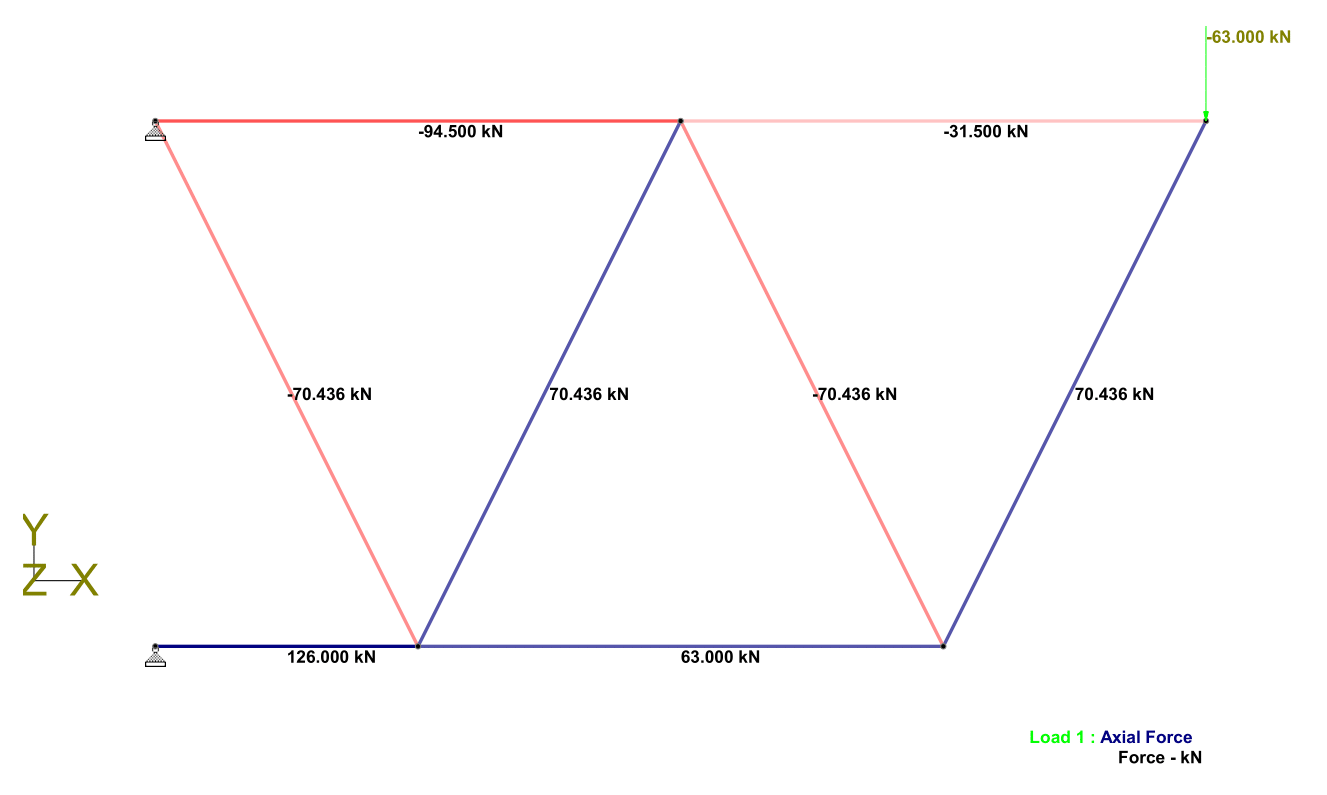

In [320]:
%%render
# Parameters
P_1 = -70.436 #kN
P_2 = 70.436 #kN
P_3 = -70.436 #kN
P_4 = 70.436 #kN
P_5 = 126 #kN
P_6 = 63 #kN
P_7 = -94.5 #kN
P_8 = -31.5 #kN

<IPython.core.display.Latex object>

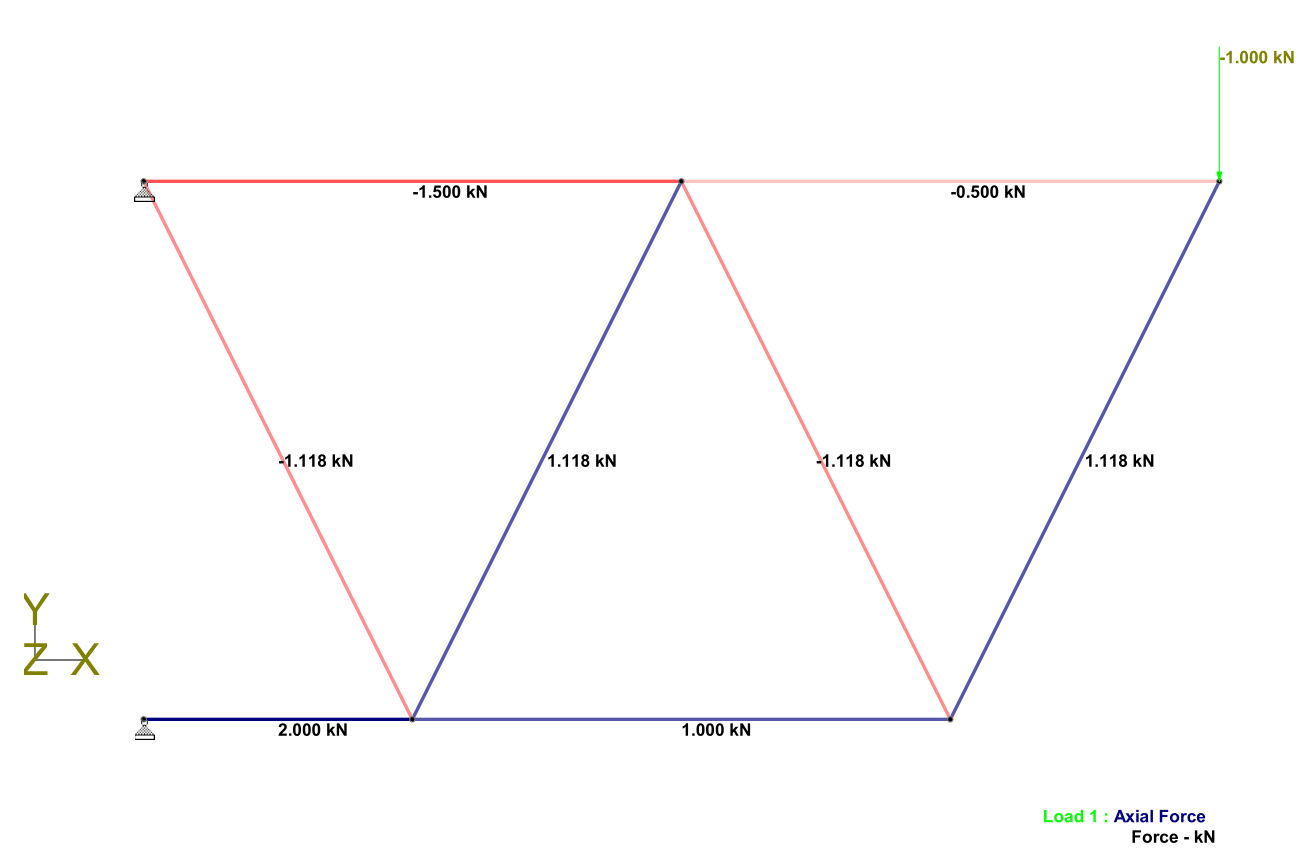

In [321]:
%%render
# Parameters
p_1 = -1.118 #kN
p_2 = 1.118 #kN
p_3 = -1.118 #kN
p_4 = 1.118 #kN
p_5 = 2 #kN
p_6 = 1 #kN
p_7 = -1.5 #kN
p_8 = -0.5 #kN

<IPython.core.display.Latex object>

##### Vertical deflection = ΣPpl/E_mean*A

In [322]:
%%render
#Long
delta_v=(l_diag*1000*((P_1*p_1)+(P_2*p_2)+(P_3*p_3)+(P_4*p_4)))/EA + ((P_5*p_5*l_5*1000)+(P_6*p_6*l_6*1000)+(P_7*p_7*l_7*1000)+(P_8*p_8*l_8*1000))/EA #mm
delta_fin = delta_v*(1 + k_def) #mm

<IPython.core.display.Latex object>

##### From EC5 table 7.2, for cantilevers, δ_lim = l/150

In [323]:
%%render
l_truss = 2 #m
delta_lim = (2*1000)/150 #mm

<IPython.core.display.Latex object>

In [324]:
if delta_fin <= delta_lim:
    print (bold + "δ_fin <= δ_lim ∴ OK")
else: 
    print (bold + "δ_fin >= δ_lim ∴ NOT OK")

δ_fin <= δ_lim ∴ OK


## **PART 3: Volume of Timber and Steel**
#### 1. Volume of timber

In [325]:
%%render
l_total = 4*l_diag + l_5 + l_6 + l_7 + l_8 #m, total length of members
V_timber =  l_total*(A*10**-6) #m^3, total volume of timber

<IPython.core.display.Latex object>

#### 2. Volume of steel

In [326]:
%%render
n_bolt = 48 #total number of bolts
rho_s = 8030 #kg/m^3, density of steel
m_bolt = 0.376 #kg, mass of one bolt
V_bolts = n_bolt * m_bolt/rho_s #m^3, total volume of steel bolts

l_plate = 7 #m
t_plate = 0.01 #m
b_plate = 0.2 #m
V_plate = l_plate*t_plate*b_plate #m^3

V_steel = V_bolts+V_plate #m^3

<IPython.core.display.Latex object>